In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seawater as sw
import cartopy.crs as ccrs                   # import projections
import cartopy.feature as cf                 # import features

#fig_dir='C:/Users/gentemann/Google Drive/f_drive/docs/projects/misst-arctic/Saildrone/'

#icefile='C:/Users/gentemann/Google Drive/f_drive/docs/projects/misst-arctic/Ice Present.xlsx'

data_dir = '/Users/senyastein/Desktop/Saildrone/'



## Read in all the cruise full data

- swap dims from obs to time
- I checked & time = for both trajectories

In [2]:
ds = xr.open_mfdataset(data_dir+'data/*.nc',combine='nested',concat_dim='trajectory') #use this for whole folder
#ds = xr.open_dataset(data_dir)

#ds = ds.rename({'latitude':'lat','longitude':'lon'})
#ds['time']=ds.time[0,:]
#ds = ds.swap_dims({'obs':'time'})
#calculate some variables
#ds['wspd_MEAN']=np.sqrt(ds.UWND_MEAN**2+ds.VWND_MEAN**2)
#ds['wdir_MEAN']=np.arctan2(ds.VWND_MEAN,ds.UWND_MEAN)*180./np.pi
#tem=sw.dens0(ds.SAL_SBE37_MEAN,ds.TEMP_SBE37_MEAN)
#ds['density_MEAN']=xr.DataArray(tem,dims=('trajectory','time'),coords={'trajectory':ds.trajectory,'time':ds.time})
#tem=sw.alpha(ds.SAL_SBE37_MEAN,ds.TEMP_SBE37_MEAN,ds.BARO_PRES_MEAN*0) #pressure =0 at surface
#ds['alpha_MEAN']=xr.DataArray(tem,dims=('trajectory','time'),coords={'trajectory':ds.trajectory,'time':ds.time})
#tem=sw.beta(ds.SAL_SBE37_MEAN,ds.TEMP_SBE37_MEAN,ds.BARO_PRES_MEAN*0) #pressure =0 at surface
#ds['beta_MEAN']=xr.DataArray(tem,dims=('trajectory','time'),coords={'trajectory':ds.trajectory,'time':ds.time})

#get rid of bad salinity values
#ds_masked=ds.where(ds.SAL_SBE37_MEAN>20)
#ds_masked['SAL_SBE37_MEAN']=ds_masked['SAL_SBE37_MEAN']



TypeError: Error: /Users/senyastein/Desktop/Saildrone/data/saildrone-gen_5-atomic_eurec4a_2020-sd1026-20200117T000000-20200302T235959-1_minutes-v1.1589306725934.nc is not a valid NetCDF 3 file
            If this is a NetCDF4 file, you may need to install the
            netcdf4 library, e.g.,

            $ pip install netcdf4
            

In [3]:
ds

NameError: name 'ds' is not defined

## Plot all the Variables 

In [4]:
for var in ds.variables:
    if 'MEAN' in var:
        print(var)
        ax=ds[var][0,:].plot(linewidth=.5,color='r',label='1036')
        ax=ds[var][1,:].plot(linewidth=.5,color='b',label='1037')
        ax=ds[var][2,:].plot(linewidth=.5,color='b',label='1037')
        plt.legend()
        plt.title('')
        plt.savefig(data_dir+'figs/'+var+'.png')
        plt.clf()

SOG_FILTERED_MEAN
COG_FILTERED_MEAN
HDG_FILTERED_MEAN
ROLL_FILTERED_MEAN
PITCH_FILTERED_MEAN
WING_HDG_FILTERED_MEAN
WING_ROLL_FILTERED_MEAN
WING_PITCH_FILTERED_MEAN
UWND_MEAN
VWND_MEAN
WWND_MEAN
GUST_WND_MEAN
WIND_MEASUREMENT_HEIGHT_MEAN
TEMP_AIR_MEAN
RH_MEAN
BARO_PRES_MEAN
PAR_AIR_MEAN
TEMP_IR_SEA_WING_UNCOMP_MEAN
TEMP_SBE37_MEAN
SAL_SBE37_MEAN
COND_SBE37_MEAN
TEMP_CTD_RBR_MEAN
SAL_RBR_MEAN
COND_RBR_MEAN
O2_CONC_SBE37_MEAN
O2_SAT_SBE37_MEAN
O2_CONC_RBR_MEAN
O2_SAT_RBR_MEAN
TEMP_O2_RBR_MEAN
CHLOR_WETLABS_MEAN
CHLOR_RBR_MEAN


<Figure size 432x288 with 0 Axes>

## Plot SSTs on map to show where vehicles whent

NameError: name 'ds' is not defined

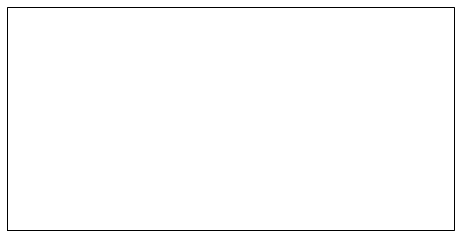

In [3]:
for i in range(3):
    fig = plt.figure(figsize=(8,12))
    ax = plt.axes(projection = ccrs.PlateCarree())  # create a set of axes with Mercator projection
    ds2 = ds.isel(trajectory=i)
    im=ax.scatter(ds2.longitude,ds2.latitude,c=ds2.SAL_SBE37_MEAN,s=.15,transform=ccrs.PlateCarree(),label=ds.trajectory[i].data,cmap='jet')
    ax.coastlines(resolution='10m')                
    ax.set_extent([ds.geospatial_lon_min -3,ds.geospatial_lon_max +3,ds.geospatial_lat_min -3,ds.geospatial_lat_max +3])
    ax.legend()
    ax.text(ds.geospatial_lon_min,ds.geospatial_lat_min +5.5, "Barbados")
    ax.text(ds.geospatial_lon_min -2,ds.geospatial_lat_min -1.5, "South America")
    cax = fig.add_axes([0.36, 0.64, 0.4, 0.02])
    cbar = fig.colorbar(im,cax=cax, orientation='horizontal')
    cbar.set_label('Salinity (psu)')
    #fig.savefig(fig_dir+'figs/map_nasa'+str(i).zfill(2)+'_data.png')    
fig = plt.figure(figsize=(8,12))
ax = plt.axes(projection = ccrs.PlateCarree()) # create a set of axes with Mercator projection
for i in range(3):
    ds2 = ds.isel(trajectory=i)
    im=ax.scatter(ds2.longitude,ds2.latitude,c=ds2.SAL_SBE37_MEAN,s=.15,transform=ccrs.PlateCarree(),label=ds.trajectory[i].data,cmap='jet')
    ax.coastlines(resolution='10m')                
    ax.set_extent([ds.geospatial_lon_min -3,ds.geospatial_lon_max +3,ds.geospatial_lat_min -3,ds.geospatial_lat_max +3]) #reset to fit data
    ax.legend()
    ax.text(ds.geospatial_lon_min,ds.geospatial_lat_min +5.5,"Barbados")
    ax.text(ds.geospatial_lon_min -2,ds.geospatial_lat_min -1.5, "South America")
    cax = fig.add_axes([0.36, 0.64, 0.4, 0.02])
    cbar = fig.colorbar(im,cax=cax, orientation='horizontal')
    cbar.set_label('Salinity (psu)')
    #fig.savefig(fig_dir+'figs/map_nasa_data.png')

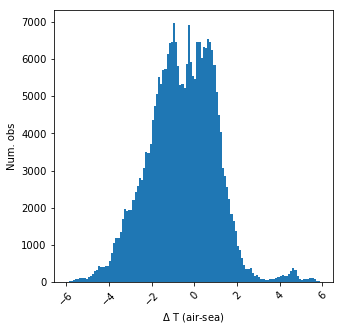

In [15]:
fig = plt.figure(figsize=(5,5))
rdif=ds.TEMP_AIR_MEAN-ds.TEMP_SBE37_MEAN
sdif=rdif.stack(z=('trajectory','time'))
plt.hist(sdif,bins=np.arange(-6,6,.1))#,rwidth=0.25)
plt.xlabel('$\Delta$ T (air-sea)')
plt.ylabel('Num. obs')
plt.xticks(rotation=45)
fig.savefig(fig_dir+'figs/nasa_air_hist.png', dpi=300)


## Make differences

In [18]:
ds['tdif_temp']=ds.TEMP_CTD_RBR_MEAN-ds.TEMP_SBE37_MEAN
ds.tdif_temp.attrs=ds.TEMP_CTD_RBR_MEAN.attrs
ds.tdif_temp.attrs['long_name']='$\Delta$'+'(RBR - SBE) '+ds.tdif_temp.attrs['long_name']

ds['tdif_sal']=ds.SAL_RBR_MEAN-ds.SAL_SBE37_MEAN
ds.tdif_sal.attrs=ds.SAL_RBR_MEAN.attrs
ds.tdif_sal.attrs['long_name']='$\Delta$'+'(RBR - SBE) '+ds.tdif_sal.attrs['long_name']

ds['tdif_O2']=ds.O2_CONC_RBR_MEAN-ds.O2_CONC_SBE37_MEAN
ds.tdif_O2.attrs=ds.O2_CONC_RBR_MEAN.attrs
ds.tdif_O2.attrs['long_name']='$\Delta$'+'(RBR - SBE) '+ds.tdif_O2.attrs['long_name']

ds['tdif_Chlor']=ds.CHLOR_RBR_MEAN-ds.CHLOR_WETLABS_MEAN
ds.tdif_Chlor.attrs=ds.CHLOR_RBR_MEAN.attrs
ds.tdif_Chlor.attrs['long_name']='$\Delta$'+'(RBR - Wetlabs) '+ds.tdif_Chlor.attrs['long_name']


In [19]:
print('CTD TEMP')
tdif=ds.tdif_temp
print(tdif.mean('time').data,tdif.std('time').data,sum(np.isfinite(tdif[0,:])).data,sum(np.isfinite(tdif[1,:])).data)
print('SAL')
tdif=ds.tdif_sal
print(tdif.mean('time').data,tdif.std('time').data,sum(np.isfinite(tdif[0,:])).data,sum(np.isfinite(tdif[1,:])).data)
print('O2 CONC')
tdif=ds.tdif_O2
print(tdif.mean('time').data,tdif.std('time').data,sum(np.isfinite(tdif[0,:])).data,sum(np.isfinite(tdif[1,:])).data)
print('Chlor')
tdif=ds.tdif_Chlor
print(tdif.mean('time').data,tdif.std('time').data,sum(np.isfinite(tdif[0,:])).data,sum(np.isfinite(tdif[1,:])).data)


CTD TEMP
[0.000285   0.00155487] [0.03737365 0.06910048] 180188 193657
SAL
[-0.1628859  -0.11785824] [0.15104013 0.24152296] 175047 182530
O2 CONC
[ 10.17133144 -10.80671161] [ 5.61114622 10.89829042] 180188 193657
Chlor
[3.76521962 2.48759336] [5.69275703 6.23046101] 175178 209898


## Plot differences

In [20]:
for var in ds.variables:
    if 'tdif' in var:
        print(var)
        ax=ds[var][0,:].plot(linewidth=.5,color='r',label='1036')
        ax=ds[var][1,:].plot(linewidth=.5,color='b',label='1037')
        plt.legend()
        plt.title('')
        plt.savefig(fig_dir+'figs/'+var+'.png')
        plt.clf()

tdif_temp
tdif_sal
tdif_O2
tdif_Chlor


<Figure size 432x288 with 0 Axes>

<xarray.DataArray 'sea_water_temperature_01' (time: 3726979)>
array([21.2418, 21.2417, 21.2413, ..., 20.4921, 20.529 , 20.5654])
Coordinates:
  * time     (time) datetime64[ns] 2019-04-18 ... 2019-11-19T16:21:29
Attributes:
    long_name:                  sea surface depth
    coordinates:                time
    standard_name:              sea_water_temperature
    installed_height:           -0.473 m
    serial_number:              SBE05609154
    model_number:               56
    sensor_description:         Seabird 56 Temperature Logger
    model_name:                 SBE 56
    product_page:               http://www.seabird.com/sbe56-temperature-logger
    nominal_sampling_schedule:  2 sec
    units:                      degrees_C
    valid_min:                  -10.0
    valid_max:                  50.0